<a href="https://colab.research.google.com/github/lizmosquera/InteligenciaComputacional/blob/master/DNNW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [16]:
dataset=tf.data.Dataset.range(10)
dataset

<RangeDataset shapes: (), types: tf.int64>

In [7]:
dataset=tf.data.Dataset.range(10)
dataset=dataset.window(5,shift=1,drop_remainder=True)
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(),end="")
  print()

01234
12345
23456
34567
45678
56789


In [8]:
dataset=tf.data.Dataset.range(10)
dataset=dataset.window(5,shift=1,drop_remainder=True)
dataset=dataset.flat_map(lambda window: window.batch(5))
for window in dataset:
  print(window.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [13]:
dataset=tf.data.Dataset.range(10)
dataset=dataset.window(5,shift=1,drop_remainder=True)
dataset=dataset.flat_map(lambda window: window.batch(5))
dataset=dataset.map(lambda window: (window[:-1],window[-1:]))
for x,y in dataset:
  print(x.numpy(), y.numpy())

[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]


In [15]:
dataset=tf.data.Dataset.range(10)
dataset=dataset.window(5,shift=1,drop_remainder=True)
dataset=dataset.flat_map(lambda window: window.batch(5))
dataset=dataset.map(lambda window: (window[:-1],window[-1:]))
dataset=dataset.shuffle(buffer_size=10) #10 data what we have
for x,y in dataset:
  print(x.numpy(), y.numpy())

[4 5 6 7] [8]
[3 4 5 6] [7]
[5 6 7 8] [9]
[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]


In [16]:
dataset=tf.data.Dataset.range(10)
dataset=dataset.window(5,shift=1,drop_remainder=True)
dataset=dataset.flat_map(lambda window: window.batch(5))
dataset=dataset.map(lambda window: (window[:-1],window[-1:]))
dataset=dataset.shuffle(buffer_size=10) #10 data what we have
dataset=dataset.batch(2).prefetch(1)#size parameter =2 corresponde Yb
for x,y in dataset:
  print("x=",x.numpy())
  print("y=",y.numpy())

x= [[3 4 5 6]
 [5 6 7 8]]
y= [[7]
 [9]]
x= [[0 1 2 3]
 [2 3 4 5]]
y= [[4]
 [6]]
x= [[4 5 6 7]
 [1 2 3 4]]
y= [[8]
 [5]]


NameError: ignored

NameError: ignored

S+P Week 2 Lesson 4

In [28]:
!pip install tf_nightly-2.0-preview

ERROR: Could not find a version that satisfies the requirement tf_nightly-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf_nightly-2.0-preview


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print (tf.__version__)

2.2.0-rc3


In [0]:
def plot_series(time,series,format="-",start=0,end=None):
  plt.plot(time[start:end],series[start:end],format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)

def trend (time,slope=0):
  return slope*time

def seasonal_pattern(season_time):
  """Just an arbitrary pattern, you can change it if you wish"""
  return np.where(season_time <0.4,np.cos(season_time*2*np.pi),1/np.exp(3*season_time))

def seasonality (time, period, amplitude=1,phase=0):
  """Repeats the same pattern at each period"""
  season_time=((time+phase)%period)/period
  return amplitude*seasonal_pattern(season_time)

def noise(time,noise_level=1,seed=None):
  rnd=np.random.RandomState(seed)
  return rnd.randn(len(time))*noise_level

time=np.arange(4*365+1,dtype="float32")
baseline=10
series=trend(time,0.1)
baseline=10
amplitude=40
slope=0.05
noise_level=5

#ceate the series
series=baseline+trend(time,slope)+seasonality(time,period=365,amplitude=amplitude)
#update with noise
series +=noise(time,noise_level,seed=42)


split_time=1000
time_train=time[:split_time]
x_train=series[:split_time]
time_valid=time[split_time:]
x_valid=series[split_time:]

#linnear regresion
window_size=20
batch_size=32
shuffle_buffer_size=1000
                

In [0]:
def windowed_dataset(series,window_size,batch_size,shuffle_buffer): #crear un dataset
  dataset=tf.data.Dataset.from_tensor_slices(series) #create a dataset
  dataset=dataset.window(window_size+1,shift=1,drop_remainder=True)#to slice the data up into the appropriate windows
  dataset=dataset.flat_map(lambda window: window.batch(window_size+1))#flatten the data out flatened into chunksin the suze of our window_size+1
  dataset=dataset.shuffle(shuffle_buffer).map(lambda window:(window[:-1],window[-1])) #shuflet it, choosing smaller number speeds
  dataset=dataset.batch(batch_size).prefetch(1)#size parameter =2 corresponde Yb
  return dataset

In [10]:
dataset=windowed_dataset(x_train,window_size,batch_size,shuffle_buffer_size)
#10=tf.keras.models.Sequential([10])
l0=tf.keras.layers.Dense(1,input_shape=[window_size])
model=tf.keras.models.Sequential([l0])

model.compile(loss="mse",optimizer=tf.keras.optimizers.SGD(lr=1e-6,momentum=0.9))
model.fit(dataset,epochs=100,verbose=0) #ignore epoch but epoch
print("layer weights {}".format(l0.get_weights())) 


layer weights [array([[-0.0260095 ],
       [-0.04583146],
       [ 0.0202564 ],
       [ 0.05298094],
       [ 0.01459993],
       [ 0.01405305],
       [-0.03054742],
       [ 0.00406868],
       [ 0.02773334],
       [-0.02789095],
       [-0.01447557],
       [-0.02868481],
       [ 0.0716445 ],
       [-0.04387813],
       [-0.02151527],
       [ 0.14625849],
       [ 0.00924861],
       [ 0.20563012],
       [ 0.24961534],
       [ 0.42225683]], dtype=float32), array([0.01811332], dtype=float32)]


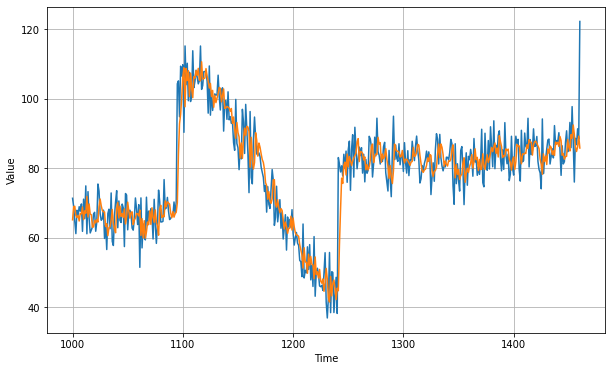

In [17]:
#print(series([1:21])
#model.predict(series[1:21][np.newaxis])
forecast=[] #forecast Vs DAta
for time in range(len(series)-window_size):
  forecast.append(model.predict(series[time:time+window_size][np.newaxis]))

forecast=forecast[split_time-window_size:]
results=np.array(forecast)[:,0,0]

plt.figure(figsize=(10,6))

plot_series(time_valid, x_valid)
plot_series(time_valid,results)

                                     


In [14]:
tf.keras.metrics.mean_absolute_error(x_valid,results).numpy()

4.955469

Deep neural


In [23]:
dataset=windowed_dataset(x_train,window_size,batch_size,shuffle_buffer_size) #DNN
model=tf.keras.models.Sequential([tf.keras.layers.Dense(10,input_shape=[window_size],activation="relu"),tf.keras.layers.Dense(10,activation="relu"),tf.keras.layers.Dense(1)])
lr_schedule=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-8*10**(epoch/20))
optimizer=tf.keras.optimizers.SGD(lr=1e-8,momentum=0.9)
model.compile(loss="mse",optimizer=optimizer)
history=model.fit(dataset,epochs=100,callbacks=[lr_schedule])

Epoch 1/100
31/31 [==============================] - 0s 2ms/step - loss: 1790.9955 - lr: 1.0000e-08
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 1225.7939 - lr: 1.1220e-08
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 757.6086 - lr: 1.2589e-08
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 444.0834 - lr: 1.4125e-08
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 256.2531 - lr: 1.5849e-08
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 162.6879 - lr: 1.7783e-08
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 119.7092 - lr: 1.9953e-08
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 106.4435 - lr: 2.2387e-08
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 100.9272 - lr: 2.5119e-08
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 101.5113 - lr: 2.8184e-08
Epoch 1

(1e-08, 0.001, 0.0, 300.0)

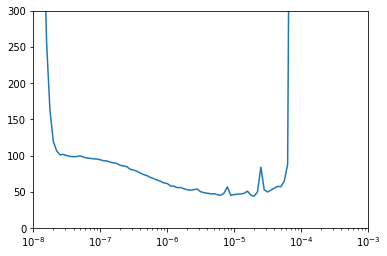

In [25]:
lrs=1e-8*(10**(np.arange(100)/20))
plt.semilogx(lrs,history.history["loss"])
plt.axis([1e-8,1e-3,0,300]) #para mirar donde el error de aprendizaje se desestabiliza 7e-6

In [26]:
window_size=30
dataset=windowed_dataset(x_train,window_size,batch_size,shuffle_buffer_size)

model=tf.keras.models.Sequential([tf.keras.layers.Dense(10,input_shape=[window_size],activation="relu"),tf.keras.layers.Dense(10,activation="relu"),tf.keras.layers.Dense(1)])

optimizer=tf.keras.optimizers.SGD(lr=7e-6,momentum=0.9)
model.compile(loss="mse",optimizer=optimizer)
history=model.fit(dataset,epochs=500)

Epoch 1/500
31/31 [==============================] - 0s 2ms/step - loss: 164.9325
Epoch 2/500
31/31 [==============================] - 0s 2ms/step - loss: 82.9928
Epoch 3/500
31/31 [==============================] - 0s 2ms/step - loss: 68.7815
Epoch 4/500
31/31 [==============================] - 0s 2ms/step - loss: 64.3930
Epoch 5/500
31/31 [==============================] - 0s 2ms/step - loss: 61.1395
Epoch 6/500
31/31 [==============================] - 0s 2ms/step - loss: 56.8339
Epoch 7/500
31/31 [==============================] - 0s 3ms/step - loss: 56.6211
Epoch 8/500
31/31 [==============================] - 0s 2ms/step - loss: 58.2305
Epoch 9/500
31/31 [==============================] - 0s 2ms/step - loss: 56.6450
Epoch 10/500
31/31 [==============================] - 0s 2ms/step - loss: 52.8397
Epoch 11/500
31/31 [==============================] - 0s 2ms/step - loss: 54.8931
Epoch 12/500
31/31 [==============================] - 0s 2ms/step - loss: 55.4225
Epoch 13/500
31/31 [====

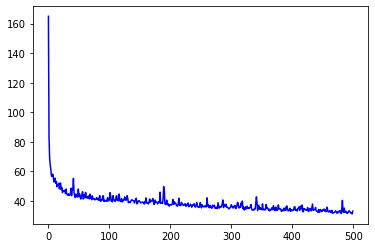

In [30]:
loss=history.history['loss']
epochs=range(500) #len(acc)
plt.plot(epochs,loss,'b',label='Training Loss')
plt.show()

[54.893123626708984, 55.42251205444336, 51.9844856262207, 53.20795822143555, 49.63359832763672, 50.475101470947266, 50.99701690673828, 51.978759765625, 48.189430236816406, 52.047569274902344, 52.198360443115234, 47.68581771850586, 49.113304138183594, 45.7043571472168, 46.612857818603516, 47.075923919677734, 46.72438430786133, 47.373783111572266, 45.04563522338867, 48.153114318847656, 44.73704528808594, 44.10173416137695, 44.03860092163086, 44.960304260253906, 43.814292907714844, 44.10599136352539, 44.715579986572266, 48.69963836669922, 43.59838104248047, 47.698978424072266, 47.7706413269043, 55.32441711425781, 45.912174224853516, 43.58151626586914, 42.33256530761719, 44.72999572753906, 43.32790756225586, 42.752647399902344, 42.82619857788086, 48.13008117675781, 42.9905891418457, 44.92520523071289, 42.84115219116211, 41.353302001953125, 43.37888717651367, 44.4921760559082, 46.36262130737305, 41.39264678955078, 42.190101623535156, 44.41936492919922, 42.189353942871094, 45.82517623901367,

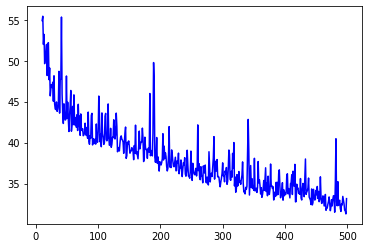

In [29]:
loss=history.history['loss']
epochs=range(10,500) #len(acc)
plot_loss=loss[10:]
print(plot_loss)
plt.plot(epochs,plot_loss,'b',label='Training Loss')
plt.show() #sigue aprendiendo

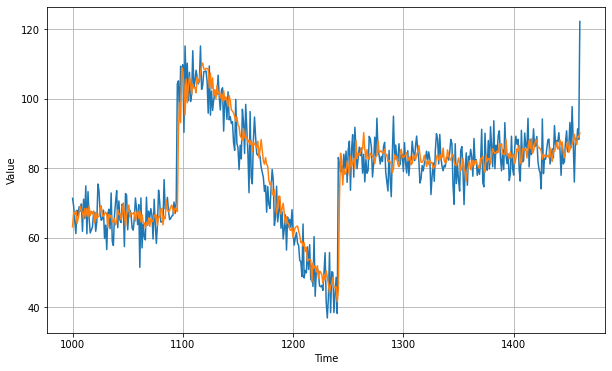

In [32]:
forecast=[] #forecast Vs DAta
for time in range(len(series)-window_size):
  forecast.append(model.predict(series[time:time+window_size][np.newaxis]))

forecast=forecast[split_time-window_size:]
results=np.array(forecast)[:,0,0]

plt.figure(figsize=(10,6))

plot_series(time_valid, x_valid)
plot_series(time_valid,results)

In [31]:
tf.keras.metrics.mean_absolute_error(x_valid,results).numpy()

7.764427